# Analisi Esplorativa del dataset Iris
In questo notebook eseguiamo un'EDA completa utilizzando esclusivamente Pandas e Matplotlib per comprendere le caratteristiche dei fiori Iris.

## 1 · Carica librerie e dataset Iris
Importiamo le librerie fondamentali, impostiamo percorsi di supporto e carichiamo il dataset Iris dal modulo `sklearn.datasets`, convertendolo in un DataFrame con nomi di colonne leggibili.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.datasets import load_iris

iris_raw = load_iris()
feature_names = [
    "sepal_length_cm",
    "sepal_width_cm",
    "petal_length_cm",
    "petal_width_cm",
]
df = pd.DataFrame(iris_raw.data, columns=feature_names)
df["species"] = pd.Categorical.from_codes(iris_raw.target, iris_raw.target_names)
feature_columns = feature_names.copy()
species_palette = {
    name: color
    for name, color in zip(iris_raw.target_names, ["#4e79a7", "#f28e2b", "#59a14f"])
}
print(f"Dataset caricato con forma {df.shape} e colonne {df.columns.tolist()}")

## 2 · Esplora struttura e riepiloghi descrittivi
Utilizziamo gli strumenti built-in di Pandas per ispezionare le prime righe, i tipi di dato, le statistiche descrittive e la presenza di valori mancanti o duplicati.

In [2]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sepal_length_cm  150 non-null    float64 
 1   sepal_width_cm   150 non-null    float64 
 2   petal_length_cm  150 non-null    float64 
 3   petal_width_cm   150 non-null    float64 
 4   species          150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [4]:
summary_stats = df.describe().T
summary_stats["iqr"] = summary_stats["75%"] - summary_stats["25%"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,iqr
sepal_length_cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,1.3
sepal_width_cm,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,0.5
petal_length_cm,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,3.5
petal_width_cm,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,1.5


In [6]:
row_count, col_count = df.shape
missing = df.isna().sum()
duplicated_rows = df.duplicated().sum()
print(f"Dimensioni: {row_count} righex× {col_count} colonne")
print("Valori mancanti per colonna:\n", missing.to_string())
print(f"Righe duplicate: {duplicated_rows}")

Dimensioni: 150 righex× 5 colonne
Valori mancanti per colonna:
 sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
Righe duplicate: 1


## 3 · Analizza distribuzioni univariate
Studiamo le distribuzioni delle singole misure tramite istogrammi/density plot e boxplot per mettere in evidenza range, simmetrie e possibili outlier.

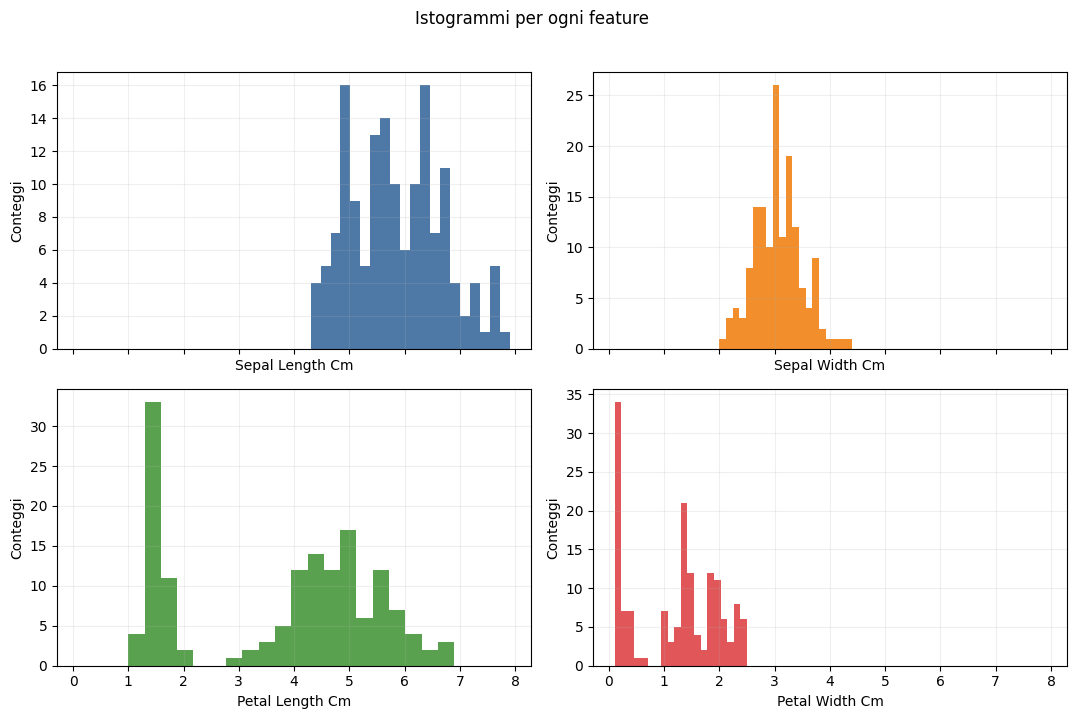

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharex=True, sharey=False)
axes_iter = axes.ravel()
for ax, feature, color in zip(
    axes_iter, feature_columns, ["#4e79a7", "#f28e2b", "#59a14f", "#e15759"]
):
    ax.hist(df[feature], bins=20, color=color)
    ax.set_xlabel(feature.replace("_", " ").title())
    ax.set_ylabel("Conteggi")
    ax.grid(alpha=0.2)
fig.suptitle("Istogrammi per ogni feature", y=1.02)
fig.tight_layout()

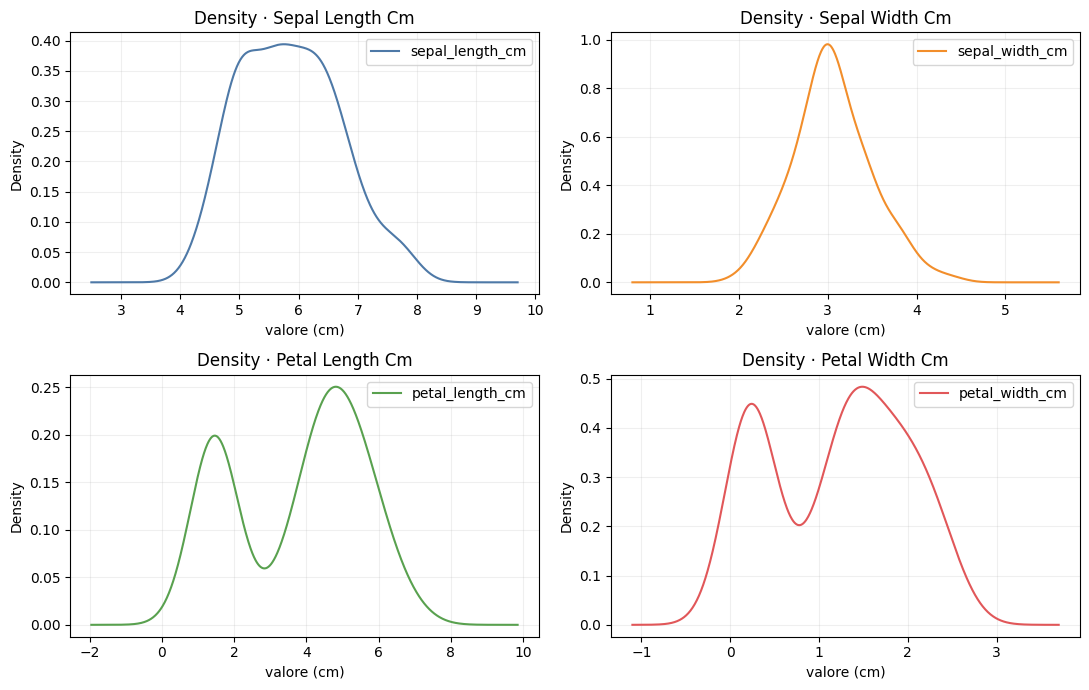

In [8]:
density_axes = df[feature_columns].plot(
    kind="density",
    subplots=True,
    layout=(2, 2),
    figsize=(11, 7),
    sharex=False,
    color=["#4e79a7", "#f28e2b", "#59a14f", "#e15759"],
)
for ax, feature in zip(np.atleast_1d(density_axes).ravel(), feature_columns):
    ax.set_title(f"Density · {feature.replace('_', ' ').title()}")
    ax.set_xlabel("valore (cm)")
    ax.grid(alpha=0.2)
plt.tight_layout()

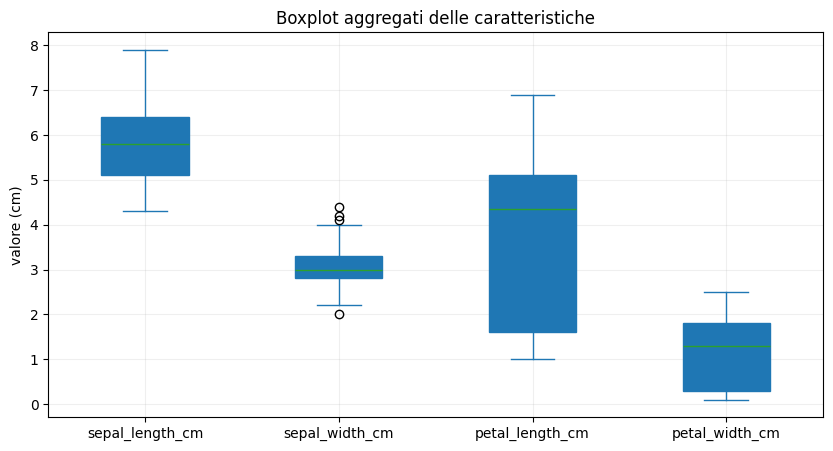

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
box = df[feature_columns].plot(kind="box", ax=ax, patch_artist=True)
colors = ["#4e79a7", "#f28e2b", "#59a14f", "#e15759"]
for patch, color in zip(box.artists, colors):
    patch.set_facecolor(color)
ax.set_title("Boxplot aggregati delle caratteristiche")
ax.set_ylabel("valore (cm)")
ax.grid(alpha=0.2)

## 4 · Confronta coppie di variabili
Creiamo una griglia di scatter plot 2×2 colorata per specie per confrontare le relazioni principali e annotiamo il coefficiente di correlazione Pearson per ogni coppia.

/tmp/ipykernel_38155/1476708748.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for species, group in df.groupby("species"):
/tmp/ipykernel_38155/1476708748.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for species, group in df.groupby("species"):
/tmp/ipykernel_38155/1476708748.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for species, group in df.groupby("species"):
/tmp/ipykernel_38155/1476708748.py:9:

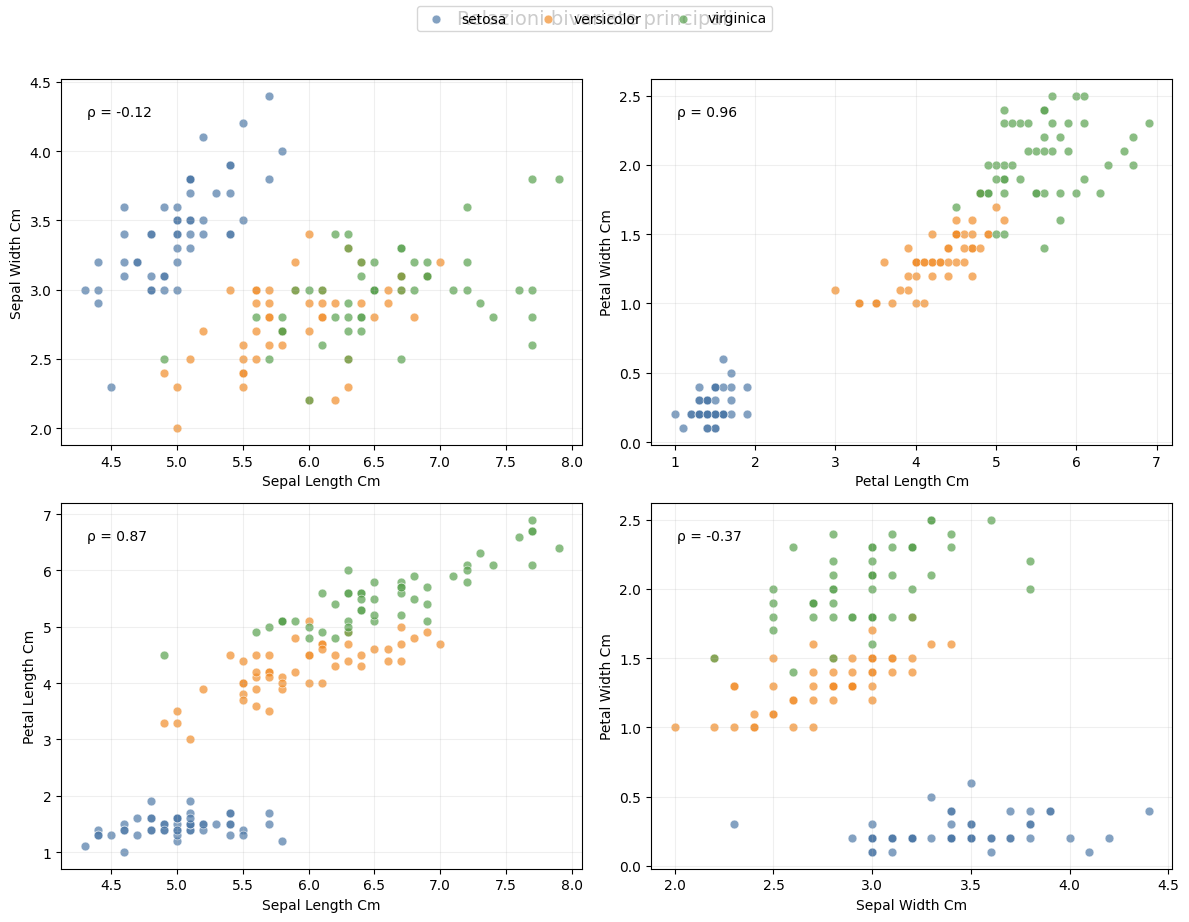

In [10]:
pairs = [
    ("sepal_length_cm", "sepal_width_cm"),
    ("petal_length_cm", "petal_width_cm"),
    ("sepal_length_cm", "petal_length_cm"),
    ("sepal_width_cm", "petal_width_cm"),
]
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
for ax, (x_col, y_col) in zip(axes.ravel(), pairs):
    for species, group in df.groupby("species"):
        ax.scatter(
            group[x_col],
            group[y_col],
            label=species,
            s=40,
            alpha=0.7,
            edgecolor="white",
            linewidth=0.5,
            color=species_palette[species],
        )
    corr_value = df[[x_col, y_col]].corr().iloc[0, 1]
    ax.annotate(f"ρ = {corr_value:.2f}", xy=(0.05, 0.9), xycoords="axes fraction")
    ax.set_xlabel(x_col.replace("_", " ").title())
    ax.set_ylabel(y_col.replace("_", " ").title())
    ax.grid(alpha=0.2)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3)
fig.suptitle("Relazioni bivariate principali", y=1.02, fontsize=14)
fig.tight_layout()

## 5 · Valuta relazione specie-misurazioni
Confrontiamo l'andamento delle misure medie per specie, visualizziamo la dispersione con violin/box plot combinati e costruiamo una heatmap delle medie normalizzate per mettere in risalto pattern di specie.

/tmp/ipykernel_38155/3516631299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_means = df.groupby("species")[feature_columns].mean()


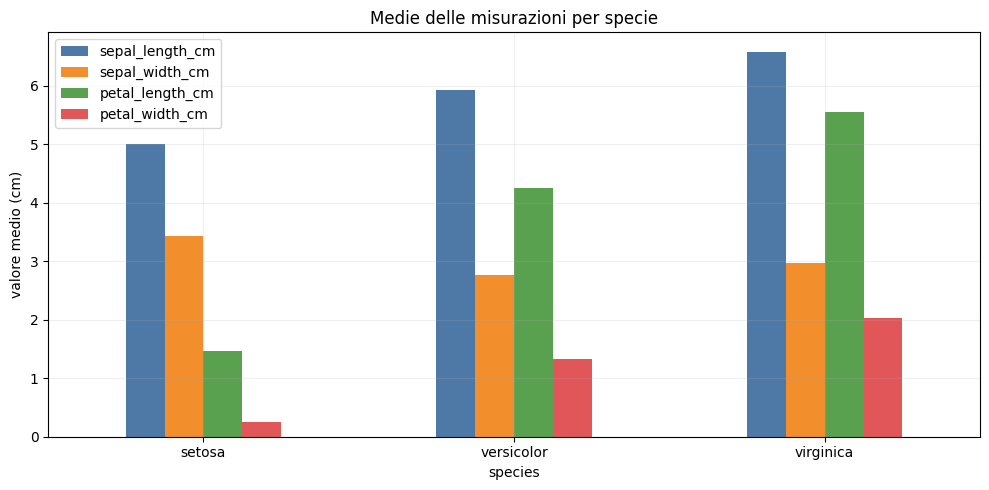

In [11]:
species_means = df.groupby("species")[feature_columns].mean()
ax = species_means.plot(
    kind="bar",
    figsize=(10, 5),
    color=["#4e79a7", "#f28e2b", "#59a14f", "#e15759"],
)
ax.set_title("Medie delle misurazioni per specie")
ax.set_ylabel("valore medio (cm)")
ax.grid(alpha=0.2)
plt.xticks(rotation=0)
plt.tight_layout()

## 6 · Personalizza stile e esporta figure
Applichiamo lo stile `fivethirtyeight`, definiamo una palette coerente, aggiungiamo annotazioni mirate e salviamo i grafici principali in formato PNG e SVG per un utilizzo successivo in slide o report.

Grafici esportati in /home/dariol/Documents/GitHub/codice_corso_python/iris_outputs


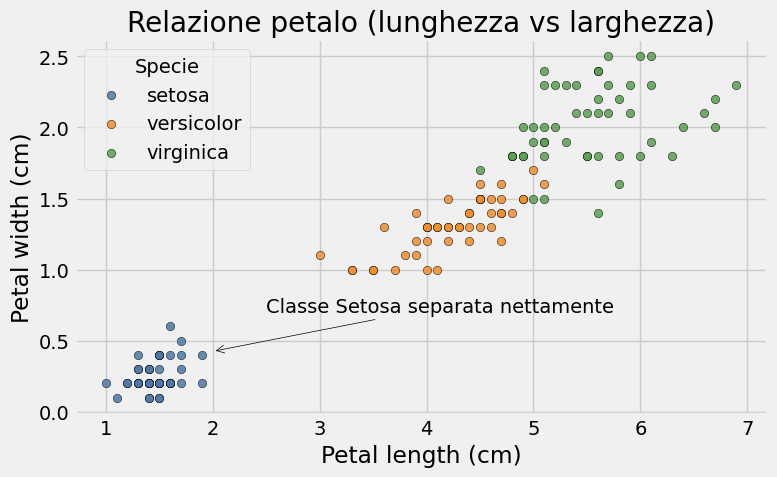

In [12]:
plt.style.use("fivethirtyeight")
output_dir = Path.cwd() / "iris_outputs"
output_dir.mkdir(exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
for species, color in species_palette.items():
    subset = df[df["species"] == species]
    ax.scatter(
        subset["petal_length_cm"],
        subset["petal_width_cm"],
        label=species,
        color=color,
        alpha=0.85,
        edgecolor="black",
        linewidth=0.4,
    )
ax.set_title("Relazione petalo (lunghezza vs larghezza)")
ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")
ax.legend(title="Specie", frameon=True)
ax.annotate(
    "Classe Setosa separata nettamente",
    xy=(2.0, 0.425),
    xytext=(2.5, 0.7),
    arrowprops=dict(arrowstyle="->", color="black"),
)
fig.tight_layout()
fig.savefig(output_dir / "petal_relationship.png", dpi=300, bbox_inches="tight")
fig.savefig(output_dir / "petal_relationship.svg", bbox_inches="tight")
print(f"Grafici esportati in {output_dir.resolve()}")

In [27]:
A = np.array([[3.0, 2.0, 10.0]])
print(A, A.shape)
B = np.array([1, 2, 3])
print(B, B.shape)

(A + B)

[[ 3.  2. 10.]] (1, 3)
[1 2 3] (3,)


array([[ 4.,  4., 13.]])